In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta   #initialize the learning rate (eta)
        self.n_iter = n_iter  #intialize the number of epochs we want to run the algorithm for

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])    # create our weight vector
        self.errors_ = []                     
        iter_count = 0
        for i in range(self.n_iter):          # for each pass  
            errors = 0                        # error counter
            for xi, target in zip(X, y):      # for each value in the training data and target data
                iter_count = iter_count + 1
                prediction = self.predict(xi) # run the learning function
                update = self.eta * (target - prediction)
                self.w_[1:] += update * xi    # scale the error_update in terms of the training data
                self.w_[0] += update          # add the scaled error to the weight vector
                errors += int(update != 0.0)  # update the error counter
            self.errors_.append(errors)       # record the number of errors into the error list
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]  # return the dot product of a training data entry with the weights

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1) # return a prediction of -1 or 1 depending on a positive or negative dot product



In [3]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
 

In [4]:
df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

### Generate a “label” data set. We will use such data sets for classification and prediction. Take window=5 days and for each day compute rolling moving average (call this x) and rolling standard deviation (call this y). For each such day, we compute the vector (x, y, label) as follows:
##### a. this day is assigned (x, y, +) if next day return is positive (or zero)
#### b. this day is assigned (x, y, -) if next day return is negative

In [5]:
win=5

new_df = df.copy()
new_df.rename(columns={'Adj Close': 'Price'}, inplace = True) 
new_df = new_df[['Date', 'Price']]
new_df['pct_change'] = new_df['Price'].pct_change() 
new_df['pct_change_size'] = abs(new_df['pct_change'])
new_df['pct_change_win'] = new_df['Price'].pct_change(win) 
new_df['std'] = new_df['pct_change'].rolling(win).std() 
new_df['pct_tomorrow'] = new_df['pct_change'].shift(1) 
new_df['label'] = new_df['pct_tomorrow'] > 0

In [6]:
new_df

,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
0,2013/9/16,34.026104,NaN,NaN,NaN,NaN,NaN,False
1,2013/9/17,33.885891,-0.004121,0.004121,NaN,NaN,NaN,False
2,2013/9/18,34.876091,0.029222,0.029222,NaN,NaN,-0.004121,False
3,2013/9/19,34.692081,-0.005276,0.005276,NaN,NaN,0.029222,True
4,2013/9/20,34.087433,-0.017429,0.017429,NaN,NaN,-0.005276,False
5,2013/9/23,34.104969,0.000514,0.000514,0.002318,0.017328,-0.017429,False
6,2013/9/24,34.140015,0.001028,0.001028,0.007499,0.017131,0.000514,True
7,2013/9/25,34.135738,-0.000125,0.000125,-0.021228,0.007783,0.001028,True
8,2013/9/26,34.514431,0.011094,0.011094,-0.005121,0.010288,-0.000125,False
9,2013/9/27,34.100506,-0.011993,0.011993,0.000384,0.008188,0.011094,True


##### plotting all data

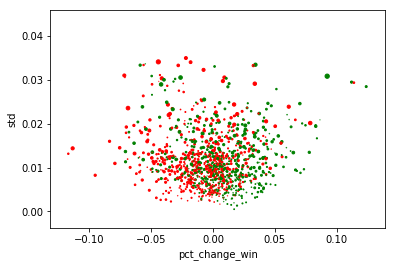

In [7]:
colors = np.where(new_df['label'] == True , 'g', 'r')
new_df.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=new_df['pct_change_size']*250 )
plt.show()

#### Pick Dec 2017 data points

In [8]:
new_df['Date'] = pd.to_datetime(new_df['Date'])
start_date = '12-01-2017'
end_date = '12-31-2017'
mask = (new_df['Date'] > start_date) & (new_df['Date'] <= end_date)
df_2017 = new_df.loc[mask]
df_2017

,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
1063,2017-12-04,32.929543,0.000599,0.000599,0.012735,0.006802,0.001200,True
1064,2017-12-05,32.732361,-0.005988,0.005988,-0.005988,0.004588,0.000599,True
1065,2017-12-06,32.663345,-0.002108,0.002108,-0.002108,0.003841,-0.005988,False
1066,2017-12-07,32.880241,0.006640,0.006640,0.000300,0.004641,-0.002108,False
1067,2017-12-08,32.821091,-0.001799,0.001799,-0.002696,0.004652,0.006640,True
1068,2017-12-11,32.860531,0.001202,0.001202,-0.002096,0.004697,-0.001799,False
1069,2017-12-12,33.047848,0.005700,0.005700,0.009638,0.004097,0.001202,True
1070,2017-12-13,33.254890,0.006265,0.006265,0.018110,0.003730,0.005700,True
1071,2017-12-14,33.185879,-0.002075,0.002075,0.009295,0.003983,0.006265,True
1072,2017-12-15,33.205597,0.000594,0.000594,0.011715,0.003554,-0.002075,False


##### plotting 2017 Dec data

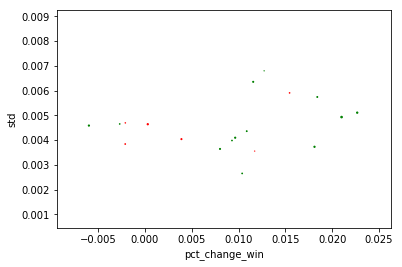

In [9]:
colors = np.where(df_2017['label'] == True , 'g', 'r')
df_2017.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=df_2017['pct_change_size']*250 )
plt.show()

#### Plot the points and (artificially) choose a line that separates your plot in 2 parts with at least 3 points in each
#### line equation:  x  = 0.01

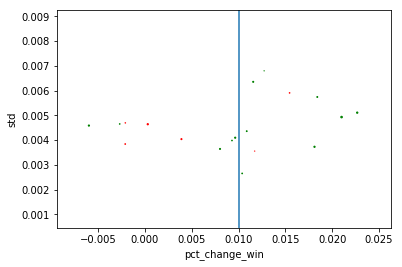

In [10]:
colors = np.where(df_2017['label'] == True , 'g', 'r')
# plotting + line 
df_2017.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=df_2017['pct_change_size']*250 )
plt.axvline(x=0.01)
plt.show()

#### Remove all misclassified points

In [11]:
df_2017['predicted_label'] = np.where(df_2017['pct_change_win']>=0.01,True,False)

misclassified_rows = []
for row in range(1063,1082):
    if df_2017.loc[row]['label']!= df_2017.loc[row]['predicted_label']:
        misclassified_rows.append(row)

misclassified_rows
df_2017

/Users/yinchiahuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label,predicted_label
1063,2017-12-04,32.929543,0.000599,0.000599,0.012735,0.006802,0.001200,True,True
1064,2017-12-05,32.732361,-0.005988,0.005988,-0.005988,0.004588,0.000599,True,False
1065,2017-12-06,32.663345,-0.002108,0.002108,-0.002108,0.003841,-0.005988,False,False
1066,2017-12-07,32.880241,0.006640,0.006640,0.000300,0.004641,-0.002108,False,False
1067,2017-12-08,32.821091,-0.001799,0.001799,-0.002696,0.004652,0.006640,True,False
1068,2017-12-11,32.860531,0.001202,0.001202,-0.002096,0.004697,-0.001799,False,False
1069,2017-12-12,33.047848,0.005700,0.005700,0.009638,0.004097,0.001202,True,False
1070,2017-12-13,33.254890,0.006265,0.006265,0.018110,0.003730,0.005700,True,True
1071,2017-12-14,33.185879,-0.002075,0.002075,0.009295,0.003983,0.006265,True,False
1072,2017-12-15,33.205597,0.000594,0.000594,0.011715,0.003554,-0.002075,False,True


In [12]:
df_2017 = df_2017.drop(misclassified_rows)
df_2017

,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label,predicted_label
1063,2017-12-04,32.929543,0.000599,0.000599,0.012735,0.006802,0.001200,True,True
1065,2017-12-06,32.663345,-0.002108,0.002108,-0.002108,0.003841,-0.005988,False,False
1066,2017-12-07,32.880241,0.006640,0.006640,0.000300,0.004641,-0.002108,False,False
1068,2017-12-11,32.860531,0.001202,0.001202,-0.002096,0.004697,-0.001799,False,False
1070,2017-12-13,33.254890,0.006265,0.006265,0.018110,0.003730,0.005700,True,True
1073,2017-12-18,33.550667,0.010392,0.010392,0.021002,0.004930,0.000594,True,True
1074,2017-12-19,33.797142,0.007346,0.007346,0.022673,0.005109,0.010392,True,True
1075,2017-12-20,33.639397,-0.004667,0.004667,0.011562,0.006355,0.007346,True,True
1077,2017-12-22,33.816864,0.003511,0.003511,0.018409,0.005742,0.001759,True,True
1078,2017-12-26,33.915459,0.002916,0.002916,0.010873,0.004361,0.003511,True,True


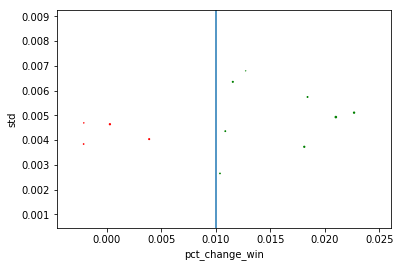

In [13]:
colors = np.where(df_2017['label'] == True , 'g', 'r')
# plotting + line 
df_2017.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=df_2017['pct_change_size']*250 )
plt.axvline(x=0.01)
plt.show()

##### Now you have a linearly separable points,  forget about your line and compute a new one that separates your points

#### training perceptron:

In [14]:
df_2017 = df_2017.reset_index()
df_2017

,index,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label,predicted_label
0,1063,2017-12-04,32.929543,0.000599,0.000599,0.012735,0.006802,0.001200,True,True
1,1065,2017-12-06,32.663345,-0.002108,0.002108,-0.002108,0.003841,-0.005988,False,False
2,1066,2017-12-07,32.880241,0.006640,0.006640,0.000300,0.004641,-0.002108,False,False
3,1068,2017-12-11,32.860531,0.001202,0.001202,-0.002096,0.004697,-0.001799,False,False
4,1070,2017-12-13,33.254890,0.006265,0.006265,0.018110,0.003730,0.005700,True,True
5,1073,2017-12-18,33.550667,0.010392,0.010392,0.021002,0.004930,0.000594,True,True
6,1074,2017-12-19,33.797142,0.007346,0.007346,0.022673,0.005109,0.010392,True,True
7,1075,2017-12-20,33.639397,-0.004667,0.004667,0.011562,0.006355,0.007346,True,True
8,1077,2017-12-22,33.816864,0.003511,0.003511,0.018409,0.005742,0.001759,True,True
9,1078,2017-12-26,33.915459,0.002916,0.002916,0.010873,0.004361,0.003511,True,True


In [15]:
# select labels
y = df_2017.iloc[0:12, 9]

def labelToInt(n):
    if n == True:
        return 1
    else:
        return -1

y = list(map(labelToInt,y))
y = np.asarray(y)

Weights: [ 0.00000000e+00 -2.21734517e-05  2.33767224e-03]


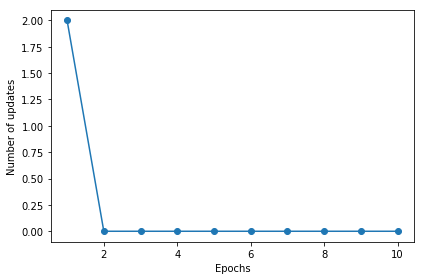

In [16]:
# extract pct_change_win and std
X = df_2017.iloc[0:12, [6, 7]].values

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
print('Weights: %s' % ppn.w_)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

#### plot decision regions

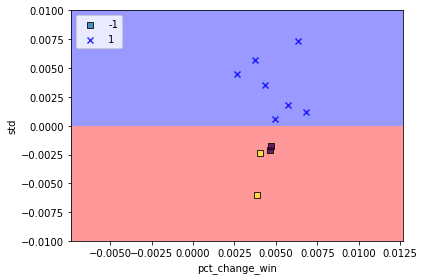

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    x2_min, x2_max = X[:, 1].min() - 0.004, X[:, 1].max() + 0.004
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
        
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('pct_change_win')
plt.ylabel('std')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()

#### Adaline: Compare error rate with different learning rate¶

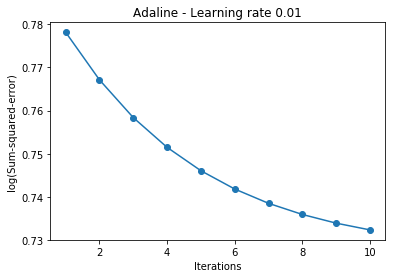

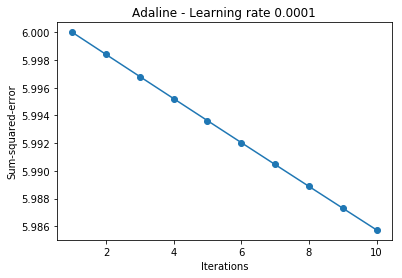

In [18]:
ada = AdalineGD(epochs=10, eta=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()

ada = AdalineGD(epochs=10, eta=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()


#### Used standardized X

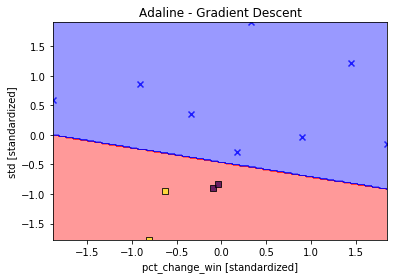

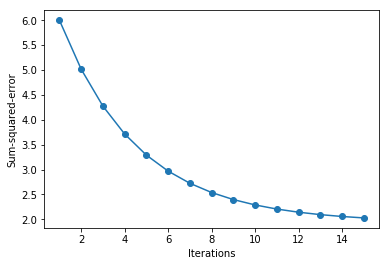

In [19]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()


ada = AdalineGD(epochs=15, eta=0.01)

ada.train(X_std, y)
plot_decision_regions(X_std, y, ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('pct_change_win [standardized]')
plt.ylabel('std [standardized]')
plt.show()

plt.plot(range(1, len( ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.show()
